<a href="https://colab.research.google.com/github/SaumyadeepPaul/Heart_Disease_predictions/blob/main/real_and__fake_images_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

 93% 97.0M/105M [00:00<00:00, 130MB/s]
100% 105M/105M [00:00<00:00, 123MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/cifake-real-and-ai-generated-synthetic-images.zip")
zip_ref.extractall("/content")

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    label_mode = "int",
    batch_size = 16,
    image_size = (120, 120)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    label_mode = "int",
    batch_size = 16,
    image_size = (120, 120)
)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(120, 120, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(120, 120, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu", input_shape=(120, 120, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(train_ds, epochs=8, validation_data=validation_ds)

Epoch 1/8
6250/6250 [==============================] - 79s 13ms/step - loss: 0.2484 - accuracy: 0.8979 - val_loss: 0.2345 - val_accuracy: 0.9058
Epoch 2/8
6250/6250 [==============================] - 79s 13ms/step - loss: 0.1797 - accuracy: 0.9287 - val_loss: 0.1788 - val_accuracy: 0.9317
Epoch 3/8
6250/6250 [==============================] - 77s 12ms/step - loss: 0.1476 - accuracy: 0.9423 - val_loss: 0.1714 - val_accuracy: 0.9334
Epoch 4/8
6250/6250 [==============================] - 81s 13ms/step - loss: 0.1175 - accuracy: 0.9545 - val_loss: 0.1900 - val_accuracy: 0.9344
Epoch 5/8
6250/6250 [==============================] - 80s 13ms/step - loss: 0.0963 - accuracy: 0.9630 - val_loss: 0.2377 - val_accuracy: 0.9279
Epoch 6/8
6250/6250 [==============================] - 76s 12ms/step - loss: 0.0767 - accuracy: 0.9708 - val_loss: 0.2343 - val_accuracy: 0.9319
Epoch 7/8
6250/6250 [==============================] - 75s 12ms/step - loss: 0.0638 - accuracy: 0.9757 - val_loss: 0.2538 - val_ac

In [ ]:
import cv2

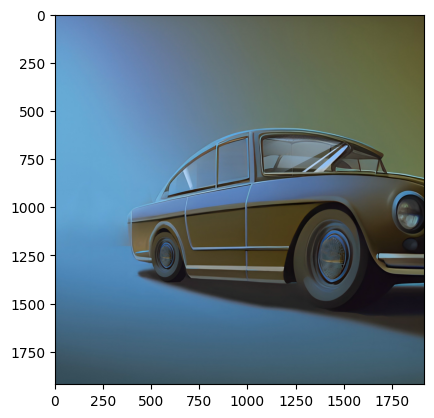

In [ ]:
test_img = cv2.imread("/content/fake-image.jpg")
plt.imshow(test_img)

In [ ]:
test_img.shape

(1920, 1920, 3)

In [ ]:
test_img = cv2.resize(test_img, (120, 120))

In [ ]:
test_input = test_img.reshape((1, 120, 120, 3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)